In [158]:
import numpy as np
import csv, sys
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata
from matplotlib.ticker import MaxNLocator
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [82]:
with open('input3.csv', 'rb') as csvfile:
    csv_data = list(csv.reader(csvfile, delimiter=','))
data = np.array(csv_data[1:], dtype=np.double)

In [83]:
ones = data[data[:,2] == 1]
zeros = data[data[:,2] == 0]

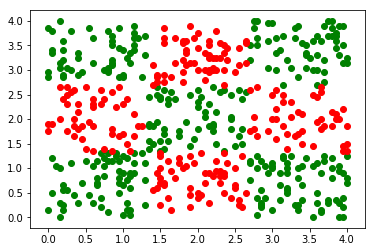

In [84]:
plt.scatter(ones[:,0], ones[:,1], color='g')
plt.scatter(zeros[:,0],zeros[:,1], color='r')

In [155]:
X = data[:,[0,1]]
Y = data[:,2]
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.6, test_size=0.4, random_state=10)

In [141]:
parameters = {'C':[0.1, 0.5, 1, 5, 10, 50, 100]}
clf = GridSearchCV(SVC(kernel='linear'), parameters, cv=5)
clf.fit(train_X, train_Y)
print clf.best_estimator_
print "Best Score"
print clf.best_score_
print "Results"
print clf.cv_results_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best Score
0.593333333333
Results
{'rank_test_score': array([1, 1, 1, 1, 1, 1, 1], dtype=int32), 'split4_test_score': array([ 0.59322034,  0.59322034,  0.59322034,  0.59322034,  0.59322034,
        0.59322034,  0.59322034]), 'mean_score_time': array([ 0.00034003,  0.00042195,  0.00042558,  0.00034318,  0.00031099,
        0.00036778,  0.00036402]), 'std_test_score': array([ 0.00360263,  0.00360263,  0.00360263,  0.00360263,  0.00360263,
        0.00360263,  0.00360263]), 'std_train_score': array([ 0.00090421,  0.00090421,  0.00090421,  0.00090421,  0.00090421,
        0.00090421,  0.00090421]), 'split1_train_score': array([ 0.59414226,  0.59414226,  0.59414226,  0.59414226,  0.59414226,
        0.59414226,  0.59414226]), 'split0_test_score': array([ 0.59016393,  

In [ ]:
parameters = {'gamma':[0.1, 1], 'degree':[4, 5, 6], 'C':[0.1, 1, 3]}
clf = GridSearchCV(SVC(kernel='poly'), param_grid=parameters, cv=5, n_jobs = 8)
clf.fit(train_X, train_Y)
print clf.best_estimator_
print "Best Score"
print clf.best_score_
print "Results"
print clf.cv_results_

In [166]:
parameters = {'gamma':[0.1, 0.5, 1, 3, 6, 10], 'C':[0.1, 0.5, 1, 5, 10, 50, 100]}
clf = GridSearchCV(SVC(kernel='rbf'), param_grid=parameters, cv=5, n_jobs = 8)
clf.fit(train_X, train_Y)
print clf.best_estimator_
print "Best Score"
print clf.best_score_
print "Results"
print clf.cv_results_

SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best Score
0.95
Results
{'rank_test_score': array([39, 39, 34, 31, 35, 38, 39, 31, 28, 26, 23, 21, 42, 29, 25, 23, 19,
       11, 37, 26, 19, 16, 18, 14, 36, 21, 16,  8, 14, 11, 33, 11,  1,  4,
        8,  6, 30,  2,  2,  4,  8,  6], dtype=int32), 'param_gamma': masked_array(data = [0.1 0.5 1 3 6 10 0.1 0.5 1 3 6 10 0.1 0.5 1 3 6 10 0.1 0.5 1 3 6 10 0.1
 0.5 1 3 6 10 0.1 0.5 1 3 6 10 0.1 0.5 1 3 6 10],
             mask = [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False],
       fill_value = ?)
, 'std_score_time': array([  2.78477473e-04,   3.16938899e-04,   2.46645448

In [146]:
parameters = {'C':[0.1, 0.5, 1, 5, 10, 50, 100]}
clf = GridSearchCV(LogisticRegression(), param_grid=parameters, cv=5, n_jobs = 8)
clf.fit(train_X, train_Y)
print clf.best_estimator_
print "Best Score"
print clf.best_score_
print "Results"
print clf.cv_results_
clf.score(test_X, test_Y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Best Score
0.593333333333
Results
{'rank_test_score': array([1, 1, 1, 1, 1, 1, 1], dtype=int32), 'split4_test_score': array([ 0.59322034,  0.59322034,  0.59322034,  0.59322034,  0.59322034,
        0.59322034,  0.59322034]), 'mean_score_time': array([ 0.0008358 ,  0.000668  ,  0.00024281,  0.00018816,  0.00018415,
        0.00022416,  0.00020037]), 'std_test_score': array([ 0.00360263,  0.00360263,  0.00360263,  0.00360263,  0.00360263,
        0.00360263,  0.00360263]), 'std_train_score': array([ 0.00090421,  0.00090421,  0.00090421,  0.00090421,  0.00090421,
        0.00090421,  0.00090421]), 'split1_train_score': array([ 0.59414226,  0.59414226,  0.59414226,  0.59414226,  0.59414226,
        0.59414226,  0.59414226]), 'spl

In [161]:
parameters = {'n_neighbors' : range(1,51), 'leaf_size' : range(5,61,5)}
clf = GridSearchCV(KNeighborsClassifier(), param_grid=parameters, cv=5, n_jobs = 8)
clf.fit(train_X, train_Y)
print clf.best_estimator_
print "Best Score"
print clf.best_score_
print "Results"
print clf.cv_results_

KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')
Best Score
0.93
Results
{'rank_test_score': array([ 12,   1,  12,  37,  61,  87,  87, 169,  49, 193,  87,  87,  87,
        73, 161,  87, 193, 182, 218, 272, 218, 218, 218, 279, 279, 279,
       279, 349, 279, 379, 349, 328, 392, 392, 385, 392, 469, 392, 493,
       445, 481, 459, 505, 517, 565, 529, 553, 538, 577, 593,  12,  12,
        12,  37,  61,  87,  87, 169,  49, 193,  87,  87,  87,  73, 161,
        87, 193, 182, 218, 279, 218, 218, 263, 328, 279, 328, 279, 349,
       279, 379, 349, 347, 392, 385, 385, 392, 469, 392, 493, 445, 481,
       459, 505, 517, 565, 529, 553, 538, 577, 577,  12,   1,  12,  37,
        61,  87,  87, 169,  49, 193,  87,  87,  87,  73, 157,  87, 193,
       182, 218, 279, 218, 218, 263, 272, 272, 279, 279, 349, 279, 379,
       349, 328, 385, 392, 442, 392, 469, 392, 493, 445, 481, 445, 505,
 

In [163]:
parameters = {'max_depth' : range(1,51), 'min_samples_split' : range(2,11)}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid=parameters, cv=5, n_jobs = 8)
clf.fit(train_X, train_Y)
print clf.best_estimator_
print "Best Score"
print clf.best_score_
print "Results"
print clf.cv_results_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Best Score
0.996666666667
Results
{'rank_test_score': array([442, 442, 442, 442, 442, 442, 442, 442, 442, 433, 433, 433, 433,
       433, 433, 433, 433, 433, 424, 424, 424, 424, 424, 424, 424, 424,
       424, 415, 415, 415, 415, 415, 415, 415, 415, 415, 218,   1,   1,
       218, 218,   1,   1, 218,   1,   1, 218,   1,   1,   1, 218, 218,
         1,   1, 218,   1,   1,   1,   1, 218,   1,   1,   1, 218, 218,
         1,   1,   1,   1,   1,   1, 218,   1,   1, 218, 218, 218,   1,
       218,   1,   1, 218, 218,   1,   1, 218,   1,   1, 218,   1, 218,
         1,   1, 218, 218, 218,   1,   1, 218, 218, 218,   1, 218,   1,
       218,   1, 218,   1, 218,   1, 218,   1, 218, 218,   1,

In [164]:
parameters = {'max_depth' : range(1,51), 'min_samples_split' : range(2,11)}
clf = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=5, n_jobs = 8)
clf.fit(train_X, train_Y)
print clf.best_estimator_
print "Best Score"
print clf.best_score_
print "Results"
print clf.cv_results_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Best Score
0.986666666667
Results
{'rank_test_score': array([442, 443, 444, 444, 448, 447, 448, 444, 448, 433, 438, 440, 435,
       434, 438, 440, 436, 436, 430, 427, 431, 432, 428, 429, 425, 426,
       424, 416, 418, 420, 415, 422, 421, 419, 417, 422, 411, 340, 392,
       312, 408, 400, 411, 414, 405, 360, 244, 340, 171, 360,  35, 208,
       208, 381,  86, 244, 275, 208, 244, 408, 406, 275, 384, 312,  58,
        58,  58, 275,  86, 312, 400, 381,  86, 340, 171, 312, 244, 128,
       171, 128, 128,   7, 208,  86,  86,  35, 360, 128, 244, 312, 208,
        35,  58,  19, 128, 275, 128, 128, 340, 275, 360,  35,